In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fantasy Cricket Optimization
from scipy.optimize import linprog

# Load IPL dataset (2008-2024)
data = pd.read_csv('C:/Users/divya/Desktop/python/Cricket Project/cricket_data.csv')

In [7]:
# -------------------------
# Bowler and Batter Matchup Analysis
# -------------------------
# Preprocess the data
# Aggregating bowler performance (assuming Player_Name as bowler for simplicity)
matchups = data.groupby(['Player_Name']).agg({
    'Runs_Conceded': 'sum',
    'Balls_Bowled': 'sum',
    'Wickets_Taken': 'sum'
}).reset_index()

In [8]:
# Ensure numeric values and handle invalid data
matchups['Balls_Bowled'] = pd.to_numeric(matchups['Balls_Bowled'], errors='coerce').fillna(0)
matchups['Runs_Conceded'] = pd.to_numeric(matchups['Runs_Conceded'], errors='coerce').fillna(0)
matchups['Wickets_Taken'] = pd.to_numeric(matchups['Wickets_Taken'], errors='coerce').fillna(0)

# Exclude players who didn't bowl
matchups = matchups[matchups['Balls_Bowled'] > 0]

# Calculate performance metrics
matchups['economy_rate'] = matchups['Runs_Conceded'] / (matchups['Balls_Bowled'] / 6)
matchups['strike_rate'] = matchups['Balls_Bowled'] / matchups['Wickets_Taken'].replace(0, np.nan)  # Avoid division by zero
matchups['strike_rate'] = matchups['strike_rate'].fillna(np.inf)


c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


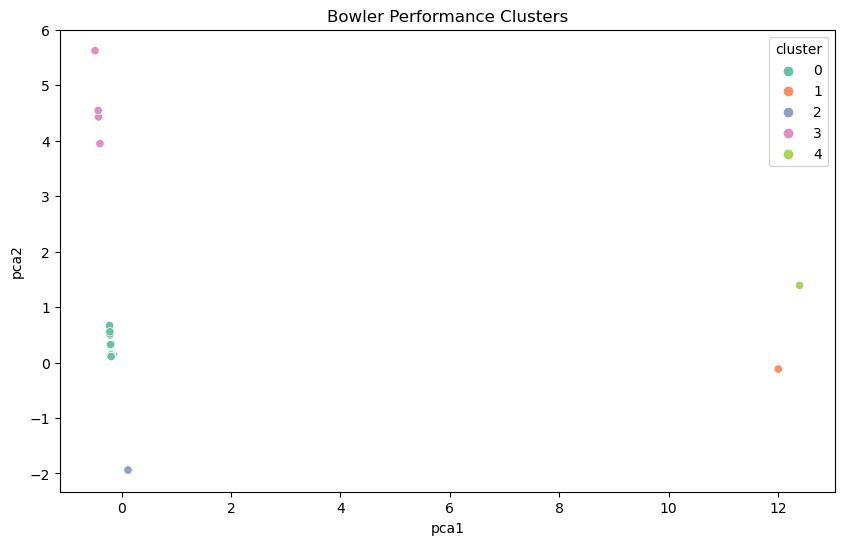

In [10]:
# Handle infinity in strike_rate
max_finite_strike_rate = matchups.loc[np.isfinite(matchups['strike_rate']), 'strike_rate'].max()
matchups['strike_rate'].replace(np.inf, max_finite_strike_rate * 1.5, inplace=True)

# Normalize the data
features = ['Runs_Conceded', 'Balls_Bowled', 'economy_rate', 'strike_rate']
scaler = StandardScaler()
normalized_data = scaler.fit_transform(matchups[features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
matchups['cluster'] = kmeans.fit_predict(normalized_data)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
matchups['pca1'] = pca_data[:, 0]
matchups['pca2'] = pca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=matchups, palette='Set2')
plt.title('Bowler Performance Clusters')
plt.show()